# DERIBIT API EXPLORATION

In [1]:
import numpy as np 

Start with the API key and secret code (Dont replicate, create ur own, there is a limit for minute request)

In [3]:
import websocket
import json
# Your Deribit credentials
api_key = 'x_uXagP8'
api_secret = 'ygSW1HwArk2tVnDU_FpByAZLMPJkaUx51Y56NS24DrI'

Index: Deribit create an bitcoin Index with data from Bitstamp, Coinbase Pro, Kraken, LMAX digital and others.
Open interest: total number of options that have not settled.
Underlying price: current market price of the asset or financial instrument in wich the option is based.
Index price: Price of the index.

## Get_Instruments

https://docs.deribit.com/#public-get_instruments 

Retrieves available trading instruments. This method can be used to see which instruments are available for trading, or which instruments have recently expired.

In [4]:


# Establish a connection to Deribit's WebSocket API
ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

# Define your authentication message
auth_message = {
    "jsonrpc": "2.0",
    "id": 1,
    "method": "public/auth",
    "params": {
        "grant_type": "client_credentials",
        "client_id": api_key,
        "client_secret": api_secret
    }
}

# Send the authentication message
ws.send(json.dumps(auth_message))
response = ws.recv()
print(response)

# Define a message to get option trading information
options_message = {
    "jsonrpc": "2.0",
    "id": 2,
    "method": "public/get_instruments",
    "params": {
        "currency": "BTC",
        "kind": "option",
        "expired": False
    }
}

# Send the message to get options information
ws.send(json.dumps(options_message))
options_response = ws.recv()
print(options_response)

# Close the WebSocket connection
ws.close()


{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scope":"name:MQE block_trade:read connection trade:read wallet:read account:read custody:read mainaccount","refresh_token":"1746731311370.1bRxzjgq.6gWWJipwIWB0to3_iyuYxa69GxR1S0dV2uNF7huYWJMd_QggMV362-kIyKR067pLhR-O9yMDc7ZBQkNVSG3Foo3-SiVz65T228BDRS7p0ck0VjQst8PiHoiHjK7jsEk9_WDz3wnxpZuGVMG333JU1AwZjcobKptNZ9ZR-VclH13PL0aD7_tDivdnluoDg4jsU4F283dO4EbDJoA1KD9ZdnLnosJ9YVn6VoTzmIxNa82ZKOEh4_ff4YhlvKBALl1KWwz8Vd2KhjP-Y1sQOj11Z5jtUYDGVgH-geQMN5v7vSK_41AGfoLfAdJ1sWY","expires_in":31536000,"access_token":"1746731311370.1RJoaugk.l4cSZFcGlVD6eE-RS24wIqgTO_YZJuI-72mItieo2BT2DPuxMr-zs6SdLkyunXHDFhGxQuAkEqkYY8ky_BlzYjww1D6IcH3IakG4qXtvPTIm5hvoIIpAhy_ayCTAWgh4nfwg5OQlvsSab8mAgNkyYgK6fq09F4VY-9Y29ajFpdZKZrfNbWQDSMvejTS9gjysGbRPub_1Ww7m8tqoybUQFUW9HAz9HUGkWhNvZAA4xWsyz0mHqfIIvoGebNxNzi77bKkqTAGdgaucDai3q-MdCnLGSEAyPlkb0lWwjAuaX8hsTggrpReszYWcODdK"},"usIn":1715195311369935,"usOut":1715195311370231,"usDiff":296,"testnet":false}
{"jsonrpc":"2.0","id

In [3]:
json.loads(options_response)['result'][:5]

[{'tick_size_steps': [{'above_price': 0.005, 'tick_size': 0.0005}],
  'quote_currency': 'BTC',
  'min_trade_amount': 0.1,
  'counter_currency': 'USD',
  'settlement_period': 'week',
  'settlement_currency': 'BTC',
  'block_trade_tick_size': 0.0001,
  'block_trade_min_trade_amount': 25,
  'block_trade_commission': 0.0003,
  'option_type': 'call',
  'creation_timestamp': 1714263493000,
  'instrument_id': 321194,
  'base_currency': 'BTC',
  'tick_size': 0.0001,
  'contract_size': 1.0,
  'strike': 44000.0,
  'is_active': True,
  'expiration_timestamp': 1714723200000,
  'instrument_type': 'reversed',
  'instrument_name': 'BTC-3MAY24-44000-C',
  'taker_commission': 0.0003,
  'maker_commission': 0.0003,
  'kind': 'option',
  'rfq': False,
  'price_index': 'btc_usd'},
 {'tick_size_steps': [{'above_price': 0.005, 'tick_size': 0.0005}],
  'quote_currency': 'BTC',
  'min_trade_amount': 0.1,
  'counter_currency': 'USD',
  'settlement_period': 'week',
  'settlement_currency': 'BTC',
  'block_trade_

In [5]:
import json

# Assuming options_response is the JSON formatted string received from the Deribit API
options_response_2 = options_response

# Parse the JSON response
parsed_response = json.loads(options_response)

# Extract the result which contains the list of instruments
instruments = parsed_response.get('result', [])

# Format and print the information in a more readable way
for instrument in instruments:
    print(f"Instrument Name: {instrument['instrument_name']}")
    print(f"Base Currency: {instrument['base_currency']}")
    print(f"Strike: {instrument['strike']}")
    print(f"Option Type: {instrument['option_type']}")
    print(f"Settlement Period: {instrument['settlement_period']}")
    print("\n")


Instrument Name: BTC-3MAY24-44000-C
Base Currency: BTC
Strike: 44000.0
Option Type: call
Settlement Period: week


Instrument Name: BTC-3MAY24-44000-P
Base Currency: BTC
Strike: 44000.0
Option Type: put
Settlement Period: week


Instrument Name: BTC-3MAY24-50000-C
Base Currency: BTC
Strike: 50000.0
Option Type: call
Settlement Period: week


Instrument Name: BTC-3MAY24-50000-P
Base Currency: BTC
Strike: 50000.0
Option Type: put
Settlement Period: week


Instrument Name: BTC-3MAY24-52000-C
Base Currency: BTC
Strike: 52000.0
Option Type: call
Settlement Period: week


Instrument Name: BTC-3MAY24-52000-P
Base Currency: BTC
Strike: 52000.0
Option Type: put
Settlement Period: week


Instrument Name: BTC-3MAY24-54000-C
Base Currency: BTC
Strike: 54000.0
Option Type: call
Settlement Period: week


Instrument Name: BTC-3MAY24-54000-P
Base Currency: BTC
Strike: 54000.0
Option Type: put
Settlement Period: week


Instrument Name: BTC-3MAY24-56000-C
Base Currency: BTC
Strike: 56000.0
Option Type: 

In [6]:
json.loads(options_response_2)

{'jsonrpc': '2.0',
 'id': 2,
 'result': [{'tick_size_steps': [{'above_price': 0.005, 'tick_size': 0.0005}],
   'quote_currency': 'BTC',
   'min_trade_amount': 0.1,
   'counter_currency': 'USD',
   'settlement_period': 'week',
   'settlement_currency': 'BTC',
   'block_trade_tick_size': 0.0001,
   'block_trade_min_trade_amount': 25,
   'block_trade_commission': 0.0003,
   'option_type': 'call',
   'creation_timestamp': 1714263493000,
   'instrument_id': 321194,
   'base_currency': 'BTC',
   'tick_size': 0.0001,
   'contract_size': 1.0,
   'strike': 44000.0,
   'is_active': True,
   'expiration_timestamp': 1714723200000,
   'instrument_type': 'reversed',
   'instrument_name': 'BTC-3MAY24-44000-C',
   'taker_commission': 0.0003,
   'maker_commission': 0.0003,
   'kind': 'option',
   'rfq': False,
   'price_index': 'btc_usd'},
  {'tick_size_steps': [{'above_price': 0.005, 'tick_size': 0.0005}],
   'quote_currency': 'BTC',
   'min_trade_amount': 0.1,
   'counter_currency': 'USD',
   'settle

In [7]:
import json
import pandas as pd


# Parse the JSON response
parsed_response = json.loads(options_response_2)

# Extract the result which contains the list of instruments
instruments = parsed_response.get('result', [])

# Create a DataFrame from the instruments data
df = pd.DataFrame(instruments)

# Convert timestamp to datetime for better readability
df['expiration_timestamp'] = pd.to_datetime(df['expiration_timestamp'], unit='ms')
df['creation_timestamp'] = pd.to_datetime(df['creation_timestamp'], unit='ms')

#Lets put instrument_name as index
df.set_index('instrument_name', inplace=True)

# Print the first few rows of the DataFrame to verify
print(df.head())


                                                  tick_size_steps  \
instrument_name                                                     
BTC-3MAY24-44000-C  [{'above_price': 0.005, 'tick_size': 0.0005}]   
BTC-3MAY24-44000-P  [{'above_price': 0.005, 'tick_size': 0.0005}]   
BTC-3MAY24-50000-C  [{'above_price': 0.005, 'tick_size': 0.0005}]   
BTC-3MAY24-50000-P  [{'above_price': 0.005, 'tick_size': 0.0005}]   
BTC-3MAY24-52000-C  [{'above_price': 0.005, 'tick_size': 0.0005}]   

                   quote_currency  min_trade_amount counter_currency  \
instrument_name                                                        
BTC-3MAY24-44000-C            BTC               0.1              USD   
BTC-3MAY24-44000-P            BTC               0.1              USD   
BTC-3MAY24-50000-C            BTC               0.1              USD   
BTC-3MAY24-50000-P            BTC               0.1              USD   
BTC-3MAY24-52000-C            BTC               0.1              USD   

           

In [8]:
#save df to csv
df.to_csv('deribit_options.csv', index=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, BTC-3MAY24-44000-C to BTC-28MAR25-300000-P
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tick_size_steps               1022 non-null   object        
 1   quote_currency                1022 non-null   object        
 2   min_trade_amount              1022 non-null   float64       
 3   counter_currency              1022 non-null   object        
 4   settlement_period             1022 non-null   object        
 5   settlement_currency           1022 non-null   object        
 6   block_trade_tick_size         1022 non-null   float64       
 7   block_trade_min_trade_amount  1022 non-null   int64         
 8   block_trade_commission        1022 non-null   float64       
 9   option_type                   1022 non-null   object        
 10  creation_timestamp            1022 non-null   datetime64[ns]
 11  in

## Ticker

Get ticker for an instrument.
Mark price = midpoint between its bid and ask prices

In [10]:
#Example of a ticker
ticker1 = df.index[-2]
print(ticker1)
print(df["expiration_timestamp"].iloc[-2])
#Lets get the last index

BTC-28MAR25-300000-C
2025-03-28 08:00:00


In [11]:
#Get options

# Establish a connection to Deribit's WebSocket API
ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

# Define your authentication message
auth_message = {
    "jsonrpc": "2.0",
    "id": 1,
    "method": "public/auth",
    "params": {
        "grant_type": "client_credentials",
        "client_id": api_key,
        "client_secret": api_secret
    }
}

# Send the authentication message
ws.send(json.dumps(auth_message))
response = ws.recv()
print(response)

# Define a message to get option trading information
options_message = {
    "jsonrpc": "2.0",
    "id": 2,
    "method": "public/ticker",
    "params": {
        "instrument_name": ticker1,
    }
}

# Send the message to get options information
ws.send(json.dumps(options_message))
options_response = ws.recv()
print(options_response)

# Close the WebSocket connection
ws.close()


{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scope":"block_trade:read connection trade:read wallet:read account:read custody:read mainaccount","refresh_token":"1746236734223.1YzfvB6Z.j8jnlcLnjwN_v39-CY1aNmFiPTA0oAILzN4rcR6H3iPBQ4hlmgnLCyW6fFuaP3ggzPBkBauXqbTeoNQMwPdfgfWpwFJy_xdMGq0fJgugdDIyLNdBxztAMYxO3nQp8FvwfZT2eMKIWNmqUgr2Ha3cuwkhl5XtkQBCyR9yGPTyl6wP6sF9KttUf0zYhP20gHKOqHrR90BweR8r97hB-cMdf74AqbWqnFr3Hch6YLWXGU8xw0pEvEyfxAOTBA3NZBAKBRGc78MGKLo0psh_Malk_AHmpYA2AVjyhQtZrRtZ4DodFA","expires_in":31536000,"access_token":"1746236734223.1R3xOOwc.zwkymG_eFtMtA2hx-BHYKnROamaJ9jRfe2ByolpFj6qeZ5kC_OwVWmgniE_Azskq2Mps7tS33-7vefkH40cAG52MsqD7sicZguTi0vzAg6CO837KhqJ2os-dKenIcc0lfSw8uMdin-DJxM5ujyZRUT7rMguGX167O5KMa89Wfl8GV5q4cxvCVDyCK_TjnpByk0AmAAA3UTzUuMZY6_3gTLZzw_OeUQo2U5Apnrqx6QkvI03Gn6ldIirJIO92m1ugreR7IJnPnnyO9mXYhmLge7yphlh68mMl42WAXyQbF_AIJRQ"},"usIn":1714700734223049,"usOut":1714700734223322,"usDiff":273,"testnet":false}
{"jsonrpc":"2.0","id":2,"result":{"estimated_delivery_p

In [12]:
# Parse the JSON response
parsed_response = json.loads(options_response)

# Extract the result which contains the list of instruments
df_3 = pd.json_normalize(parsed_response['result'])
df_3['timestamp'] = pd.to_datetime(df_3['timestamp'], unit='ms')
df_3.head()

estimated_delivery_price  best_bid_amount  best_ask_amount  bid_iv  ask_iv  \
0                  59375.43              1.0              0.1   79.68   81.71   

  underlying_index  underlying_price  best_bid_price  mark_iv  best_ask_price  \
0      BTC-28MAR25          63547.83          0.0115    80.84          0.0135   

   ...  greeks.rho  greeks.theta  greeks.vega  greeks.gamma  greeks.delta  \
0  ...    21.86584      -7.73408     63.00342           0.0       0.05076   

   stats.volume_usd stats.volume  stats.price_change  stats.low stats.high  
0             71.07          0.1                 0.0      0.012      0.012  

[1 rows x 31 columns]

# Getting the options from the WEB 

In [22]:
import requests
import time
from datetime import datetime, timedelta
# Calculate the timestamps for the last month
end_time = datetime.now()
start_time = end_time - timedelta(hours=1)

# Convert timestamps to milliseconds since epoch
end_timestamp = int(time.mktime(end_time.timetuple()) * 1000)
start_timestamp = int(time.mktime(start_time.timetuple()) * 1000)

In [23]:

# Call the function with appropriate parameters
currency = 'BTC'
kind = 'option'

In [26]:
#Get options

# Establish a connection to Deribit's WebSocket API
ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

# Define your authentication message
auth_message = {
    "jsonrpc": "2.0",
    "id": 1,
    "method": "public/auth",
    "params": {
        "grant_type": "client_credentials",
        "client_id": api_key,
        "client_secret": api_secret
    }
}

# Send the authentication message
ws.send(json.dumps(auth_message))
response = ws.recv()
print(response)

# Define a message to get option trading information
options_message = {
    "jsonrpc": "2.0",
    "id": 2,
    "method": "public/get_last_trades_by_currency_and_time",
    "params": {
        'currency': currency,
        'kind': kind,
        'start_timestamp': start_timestamp,
        'end_timestamp': end_timestamp,
        'count': 1000,
        'sorting': 'asc'
    }
}

# Send the message to get options information
ws.send(json.dumps(options_message))
options_response = ws.recv()
print(options_response)

# Close the WebSocket connection
ws.close()
#Lets create this into a function



{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scope":"name:MQE block_trade:read connection trade:read wallet:read account:read custody:read mainaccount","refresh_token":"1746731985455.1a_29fto.dET_KiSKpFVZZpmcQQ1WiMHQQ8Aj0Je2WJGDY-BTdCO7t819l9fVVw20gnWRtlPHtBDrcY2HHd_P8Kgz8QN2mTq7C9zDy0lbk6IcM6FETYZlof4P3GIj8jQ-tkyIo8sPUxJOp4TzjfflMOOFEjnxoNqct_PgaU24K_jU6BI2coDWaRTx5KLGkr4zalEjzE6xuPHuKipSPZ7EAjmvf20a_MAjI7d8AAUQKOWcPFqMRLa9YyYoI7HE4_Kw1yp8fKEdWsSRHC2LeyvBiStdMruFohBHc1rk776fROWAUxstJ4qDFsavzdY9XAtTYM0","expires_in":31536000,"access_token":"1746731985455.1WSBXJMZ.oAd71d5qnx_KIu-DHzTaXAa37KzasE1zFMfl4x1Z-xU5gTjoYFfL-8TRocWaBEH9SzRJ8fUpjUMlyUeMsNQ1NyZm6JLHWDnky0sY4Vj635XpHSUn07e0SetmEGnhddBu3l_9PyXgnwl3A7Hl16Tll2A7Z2uehDtzTyxk2i3cwBPRJLNtP4uYBJYMI61Rj3AhicQeAZ_YTljiKFrTd0d65iyWwvfYlBu3a7bAodPUBoBslVwJIOmSUsSrwEMaT_026MCn4nS6dPZXhna4bxCIwoCxUL7mi43TnZH8abj5CSoJALsCNrEoxNbgjzNX"},"usIn":1715195985455424,"usOut":1715195985455658,"usDiff":234,"testnet":false}
{"jsonrpc":"2.0","id

In [27]:
import pandas as pd
# Parse the JSON response
parsed_response = json.loads(options_response)

# Extract the result which contains the list of instruments
df_4 = pd.json_normalize(parsed_response['result']['trades'])
df_4['timestamp'] = pd.to_datetime(df_4['timestamp'], unit='ms')
#df_4['timestamp'] = pd.to_datetime(df_3['timestamp'], unit='ms')
df_4.head()

trade_id  contracts      instrument_name  tick_direction  trade_seq  \
0  300845822        0.1  BTC-10MAY24-65000-C               1       1540   
1  300845823        0.1  BTC-17MAY24-74000-C               0        400   
2  300845824        1.3  BTC-17MAY24-74000-C               1        401   
3  300845825        0.1  BTC-10MAY24-65000-C               1       1541   
4  300845826        0.2  BTC-10MAY24-65000-C               1       1542   

   mark_price  index_price  amount direction   price     iv  \
0    0.001833     62688.54     0.1      sell  0.0017  45.41   
1    0.000958     62681.31     0.1       buy  0.0010  55.90   
2    0.000958     62681.31     1.3      sell  0.0010  55.90   
3    0.001813     62682.38     0.1      sell  0.0017  45.54   
4    0.001813     62681.37     0.2      sell  0.0017  45.57   

                timestamp  
0 2024-05-08 18:20:30.071  
1 2024-05-08 18:20:31.706  
2 2024-05-08 18:20:31.719  
3 2024-05-08 18:20:33.395  
4 2024-05-08 18:20:36.554

In [33]:
#From df_4, lets keep only the call options, that is, the instrument_name that ends with "C"
calls = df_4[df_4['instrument_name'].str.endswith('C')].copy()
#Lets also create the maturity date and the strike price, using the instrument_name
calls.loc[:,'maturity'] = calls['instrument_name'].apply(lambda x: x.split('-')[1])
calls.loc[:,'strike'] = calls['instrument_name'].apply(lambda x: x.split('-')[2])
calls.loc[:,'strike'] = calls['strike'].apply(lambda x: x[:-1])
calls.loc[:,'strike'] = calls['strike'].astype(float)
calls.loc[:,'maturity'] = pd.to_datetime(calls['maturity'],format='%d%b%y')
calls.head()

trade_id  contracts      instrument_name  tick_direction  trade_seq  \
0  300845822        0.1  BTC-10MAY24-65000-C               1       1540   
1  300845823        0.1  BTC-17MAY24-74000-C               0        400   
2  300845824        1.3  BTC-17MAY24-74000-C               1        401   
3  300845825        0.1  BTC-10MAY24-65000-C               1       1541   
4  300845826        0.2  BTC-10MAY24-65000-C               1       1542   

   mark_price  index_price  amount direction   price     iv  \
0    0.001833     62688.54     0.1      sell  0.0017  45.41   
1    0.000958     62681.31     0.1       buy  0.0010  55.90   
2    0.000958     62681.31     1.3      sell  0.0010  55.90   
3    0.001813     62682.38     0.1      sell  0.0017  45.54   
4    0.001813     62681.37     0.2      sell  0.0017  45.57   

                timestamp             maturity  strike  
0 2024-05-08 18:20:30.071  2024-05-10 00:00:00  6500.0  
1 2024-05-08 18:20:31.706  2024-05-17 00:00:00  7400.0  
2 2024-05-08 18:20:31.719  2024-05-17 00:00:00  7400.0  
3 2024-05-08 18:20:33.395  2024-05-10 00:00:00  6500.0  
4 2024-05-08 18:20:36.554  2024-05-10 00:00:00  6500.0

In [46]:
#Print calls unique instrument_name
calls['instrument_name'].unique()

array(['BTC-10MAY24-65000-C', 'BTC-17MAY24-74000-C',
       'BTC-11MAY24-62500-C', 'BTC-9MAY24-62500-C', 'BTC-9MAY24-63000-C',
       'BTC-10MAY24-62500-C', 'BTC-28JUN24-60000-C',
       'BTC-17MAY24-69000-C', 'BTC-28JUN24-70000-C',
       'BTC-27SEP24-130000-C', 'BTC-28JUN24-120000-C',
       'BTC-28JUN24-75000-C', 'BTC-28JUN24-90000-C',
       'BTC-26JUL24-63000-C', 'BTC-11MAY24-63000-C',
       'BTC-10MAY24-70000-C', 'BTC-10MAY24-63000-C',
       'BTC-31MAY24-60000-C', 'BTC-31MAY24-70000-C',
       'BTC-17MAY24-68000-C', 'BTC-24MAY24-74000-C',
       'BTC-27SEP24-180000-C', 'BTC-27SEP24-105000-C',
       'BTC-28JUN24-85000-C', 'BTC-17MAY24-66000-C',
       'BTC-31MAY24-78000-C', 'BTC-10MAY24-65500-C',
       'BTC-10MAY24-64500-C', 'BTC-31MAY24-90000-C',
       'BTC-10MAY24-63500-C', 'BTC-24MAY24-72000-C',
       'BTC-31MAY24-73000-C', 'BTC-28JUN24-64000-C',
       'BTC-31MAY24-77000-C', 'BTC-27SEP24-70000-C',
       'BTC-26JUL24-73000-C', 'BTC-24MAY24-82000-C',
       'BTC-10MAY24-6

In [68]:
#Lets sample one instrument_name
instrument_name_1 = calls['instrument_name'].iloc[6]
import requests
import time
from datetime import datetime, timedelta
# Calculate the timestamps for the last month
end_time = datetime.now()
start_time = end_time - timedelta(hours=1)

# Convert timestamps to milliseconds since epoch
end_timestamp = int(time.mktime(end_time.timetuple()) * 1000)
start_timestamp = int(time.mktime(start_time.timetuple()) * 1000)

'BTC-9MAY24-62500-C'

In [74]:
#Get options

# Establish a connection to Deribit's WebSocket API
ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

# Define a message to get option trading information
options_message = {
    "jsonrpc": "2.0",
    "id": 2,
    "method": "public/get_mark_price_history",
    "params": {
        'instrument_name': 'BTC-28JUN24-60000-C',
        'start_timestamp': start_timestamp,
        'end_timestamp': end_timestamp
    }
}

# Send the message to get options information
ws.send(json.dumps(options_message))
options_response = ws.recv()
print(options_response)

# Close the WebSocket connection
ws.close()
#Lets create this into a function


{"jsonrpc":"2.0","id":2,"result":[[1715197030801,0.1026522484915296],[1715197031807,0.10262298141810465],[1715197033728,0.10262348761246486],[1715197034828,0.10262373995142784],[1715197036843,0.10262054709521157],[1715197037729,0.10260523385645125],[1715197038729,0.10260552266085723],[1715197040729,0.10260466774274064],[1715197041879,0.10260352694099785],[1715197042885,0.10259523424364173],[1715197044902,0.10259484685757608],[1715197045731,0.10259484685757608],[1715197045908,0.10259500349622111],[1715197047920,0.10257267627929346],[1715197048730,0.10257267627929346],[1715197048927,0.10257322194604152],[1715197049733,0.10257322194604152],[1715197051948,0.10256766441380409],[1715197053132,0.10256414685479545],[1715197053964,0.10250117650590752],[1715197055976,0.1026418752837763],[1715197056731,0.10261508423496425],[1715197057461,0.10261508423496425],[1715197058999,0.102592235978228],[1715197059732,0.10260583093599691],[1715197060005,0.10260583093599691],[1715197061626,0.10259275556276412

In [75]:
import pandas as pd
# Parse the JSON response
parsed_response = json.loads(options_response)

df_5 = pd.DataFrame(parsed_response['result'])
#Lets first name the columns
df_5.columns = ['timestamp','mark_price']
df_5['timestamp'] = pd.to_datetime(df_5['timestamp'], unit='ms')
df_5

timestamp  mark_price
0   2024-05-08 19:37:10.801    0.102652
1   2024-05-08 19:37:11.807    0.102623
2   2024-05-08 19:37:13.728    0.102623
3   2024-05-08 19:37:14.828    0.102624
4   2024-05-08 19:37:16.843    0.102621
..                      ...         ...
257 2024-05-08 19:41:38.762    0.103861
258 2024-05-08 19:41:39.764    0.103864
259 2024-05-08 19:41:40.763    0.103858
260 2024-05-08 19:41:41.762    0.103862
261 2024-05-08 19:41:42.762    0.103861

[262 rows x 2 columns]

In [76]:
def get_mark_price_history(instrument_name, start_timestamp, end_timestamp):
    # Establish a connection to Deribit's WebSocket API
    ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

    # Define a message to get option trading information
    options_message = {
        "jsonrpc": "2.0",
        "id": 2,
        "method": "public/get_mark_price_history",
        "params": {
            'instrument_name': instrument_name,
            'start_timestamp': start_timestamp,
            'end_timestamp': end_timestamp
        }
    }

    # Send the message to get options information
    ws.send(json.dumps(options_message))
    options_response = ws.recv()
    print(options_response)

    # Close the WebSocket connection
    ws.close()
    return options_response

In [77]:
#Lets create a loop to get the mark price history for all the calls instrument_name. We take in consideration the possibility that the result may be empty
mark_prices = []
failed_requests = []
for instrument_name in calls['instrument_name'].unique():
    try:
        response = get_mark_price_history(instrument_name, start_timestamp, end_timestamp)
        parsed_response = json.loads(response)
        df = pd.DataFrame(parsed_response['result'])
        df.columns = ['timestamp','mark_price']
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df['instrument_name'] = instrument_name
        mark_prices.append(df)
    except:
        print(f"Error getting mark price history for {instrument_name}")
        df['instrument_name'] = instrument_name
        df['timestamp'] = calls['timestamp'].iloc[0]
        failed_requests.append(df)
        pass

{"jsonrpc":"2.0","id":2,"result":[],"usIn":1715197507662103,"usOut":1715197507663021,"usDiff":918,"testnet":false}
Error getting mark price history for BTC-10MAY24-65000-C
{"jsonrpc":"2.0","id":2,"result":[],"usIn":1715197508889658,"usOut":1715197508890570,"usDiff":912,"testnet":false}
Error getting mark price history for BTC-17MAY24-74000-C
{"jsonrpc":"2.0","id":2,"result":[],"usIn":1715197510116622,"usOut":1715197510117647,"usDiff":1025,"testnet":false}
Error getting mark price history for BTC-11MAY24-62500-C
{"jsonrpc":"2.0","id":2,"result":[],"usIn":1715197511166019,"usOut":1715197511167081,"usDiff":1062,"testnet":false}
Error getting mark price history for BTC-9MAY24-62500-C
{"jsonrpc":"2.0","id":2,"result":[],"usIn":1715197512222928,"usOut":1715197512223885,"usDiff":957,"testnet":false}
Error getting mark price history for BTC-9MAY24-63000-C
{"jsonrpc":"2.0","id":2,"result":[],"usIn":1715197513500101,"usOut":1715197513500987,"usDiff":886,"testnet":false}
Error getting mark price 

/Users/luisj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luisj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


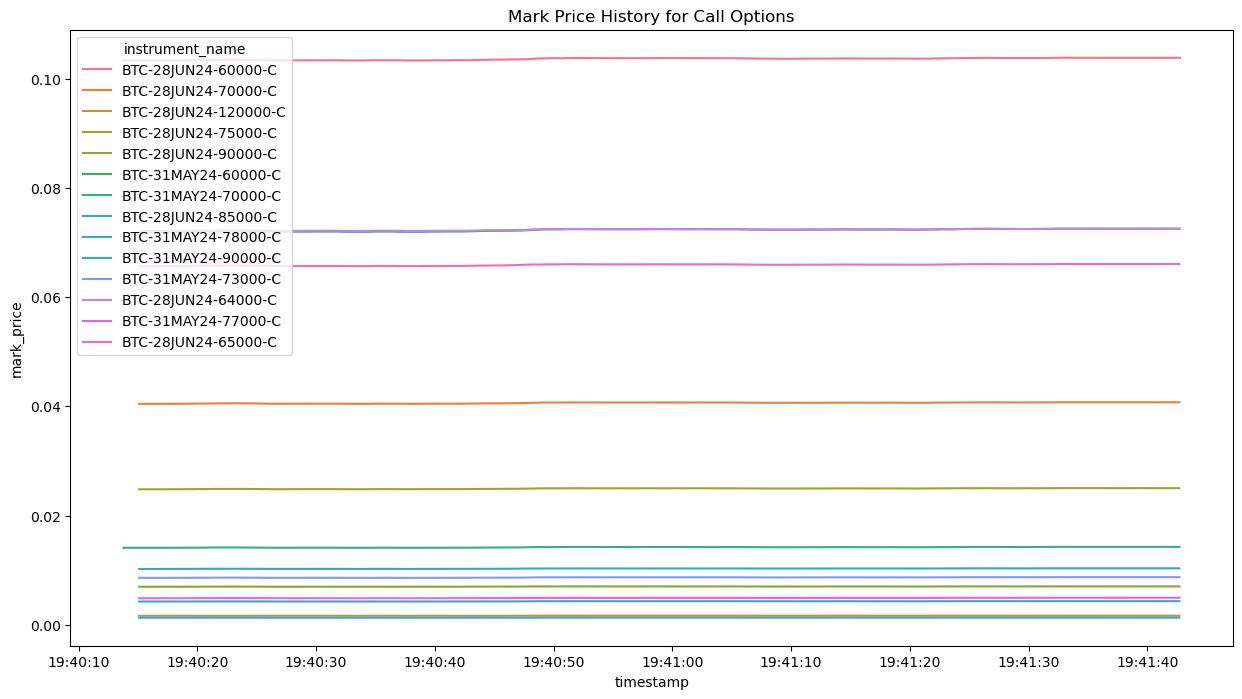

In [81]:
mark_prices_df = pd.concat(mark_prices)
#Lets plot the mark price history for all the calls
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.lineplot(data=mark_prices_df, x='timestamp', y='mark_price', hue='instrument_name')
plt.title('Mark Price History for Call Options')
plt.show()

In [1]:
#Lets create a delta function
def delta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        delta = np.exp(-r * T) * norm.cdf(d1)
    elif option_type == 'put':
        delta = np.exp(-r * T) * (norm.cdf(d1) - 1)
    return delta

In [83]:

def get_last_trades(currency, kind, start_time, end_time, count=1000):
    # Convert timestamps to milliseconds since epoch
    end_timestamp = int(time.mktime(end_time.timetuple()) * 1000)
    start_timestamp = int(time.mktime(start_time.timetuple()) * 1000)

    # Establish a connection to Deribit's WebSocket API
    ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

    # Define your authentication message
    auth_message = {
        "jsonrpc": "2.0",
        "id": 1,
        "method": "public/auth",
        "params": {
            "grant_type": "client_credentials",
            "client_id": api_key,
            "client_secret": api_secret
        }
    }

    # Send the authentication message
    ws.send(json.dumps(auth_message))
    response = ws.recv()
    print(response)

    # Define a message to get option trading information
    options_message = {
        "jsonrpc": "2.0",
        "id": 2,
        "method": "public/get_last_trades_by_currency_and_time",
        "params": {
            'currency': currency,
            'kind': kind,
            'start_timestamp': start_timestamp,
            'end_timestamp': end_timestamp,
            'count': count,
            'sorting': 'asc'
        }
    }

    # Send the message to get options information
    ws.send(json.dumps(options_message))
    options_response = ws.recv()
    print(options_response)

    # Close the WebSocket connection
    ws.close()

    return options_response


def get_calls(options_response):
    parsed_response = json.loads(options_response)
    df_4 = pd.json_normalize(parsed_response['result']['trades'])
    df_4['timestamp'] = pd.to_datetime(df_4['timestamp'], unit='ms')
    calls = df_4[df_4['instrument_name'].str.endswith('C')].copy()
    calls.loc[:,'maturity'] = calls['instrument_name'].apply(lambda x: x.split('-')[1])
    calls.loc[:,'strike'] = calls['instrument_name'].apply(lambda x: x.split('-')[2])
    calls.loc[:,'strike'] = calls['strike'].apply(lambda x: x[:-1])
    calls.loc[:,'strike'] = calls['strike'].astype(float)
    calls.loc[:,'maturity'] = pd.to_datetime(calls['maturity'],format='%d%b%y')
    #Lets create a time to maturity column, and also a delta column
    calls.loc[:,'time_to_maturity'] = (calls['maturity'] - calls['timestamp']).dt.days
    calls.loc[:,'delta'] = delta(S=calls['index_price'], K=calls['strike'], r=0.01, T=calls['time_to_maturity']/365, sigma=calls['iv'], option_type='call')
    return calls

In [84]:
import requests
import time
from datetime import datetime, timedelta
# Calculate the timestamps for the last month
end_time = datetime.now()
#Lets near the end time to the nearst hour
end_time = end_time.replace(minute=0, second=0, microsecond=0)
#Lets reduce the start time to 1 hour before
start_time = end_time - timedelta(hours=1)

#Lets create this as a function
def time_lapse(start_time, end_time):
    # Convert timestamps to milliseconds since epoch
    end_timestamp = int(time.mktime(end_time.timetuple()) * 1000)
    start_timestamp = int(time.mktime(start_time.timetuple()) * 1000)
    return start_timestamp, end_timestamp

In [85]:
#Lets create a loop to get the calls for the last day, looping every hour
calls = []
for i in range(24):
    start_time = end_time - timedelta(hours=1)
    start_timestamp, end_timestamp = time_lapse(start_time, end_time)
    response = get_last_trades('BTC', 'option', start_time, end_time)
    calls.append(get_calls(response))
    end_time = start_time

{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scope":"name:MQE block_trade:read connection trade:read wallet:read account:read custody:read mainaccount","refresh_token":"1746734096511.1bN2xuVZ.JAUyRplkfLsW2sat7ImY2gwQOkfV6fiKVNRzRnMoOsEn6FB8Bz_v8hcW5x017Vb3RUiQ6aWQAwhsX9gxb-6gqXA7AhCCikhalHDQibOCKw_duHo9eWwiBgnBV3K7A8kXnNZMckgS-m-_PA1a0UbX75NJW-sVdObD_iPiJGNplsrJDYq5LpbHZkHY5wGAr_k26CUzN0YlpWNuspe5CuI2AxUjyDIlyuAM12xepKP0l3dE_ZqdevB_8lCxxA2DVxoCw9I8o6GHf3ufjluWugcPP-2G9seAQ-w9j5FWpEP75ckbRThZOCUHulvYWLI","expires_in":31536000,"access_token":"1746734096511.1RE-2M5N._xPqqpo_-3YEtusThbd5DgU11qkEirSj3tRbHijjntpMyeoEnLfXaBSXaLrPdpQzJCBqDT4ZCVb01wPTD-j7U_uv23_dmp4-n6TxlFUXmzFfyEBRmV-dcLMSyYhfhNbaKCLSNmsc06FJDBI3EgKqaoAUgbQGIno9FjS0oKgzg2AmcEPBVXuYKPL344dvv3b6b8mM9B7IOETZArz9AE4K7B8aumHeTYS_famGcbMsLL8LEt4CX12aEZIw4XPo9q3Oge7Gt77Ri4aRi3rUqRWKAT9tGAbzDqtOWdpNqHGXI1cb4bSrmunkmyr_xjY2"},"usIn":1715198096511771,"usOut":1715198096512010,"usDiff":239,"testnet":false}
{"jsonrpc":"2.0","id

In [87]:
calls_df = pd.concat(calls)
calls_df.head()

trade_id  contracts      instrument_name  tick_direction  trade_seq  \
14  300844911        0.1  BTC-31MAY24-63000-C               0        922   
15  300844917        4.9  BTC-10MAY24-67000-C               3       1313   
16  300844931        0.1  BTC-28JUN24-75000-C               3       4144   
17  300844937        0.2   BTC-9MAY24-62500-C               0         69   
18  300844984        0.5   BTC-9MAY24-62500-C               1         70   

    mark_price  index_price  amount direction   price     iv  \
14    0.048109     62553.39     0.1      sell  0.0485  50.06   
15    0.000442     62545.19     4.9       buy  0.0005  56.59   
16    0.025926     62551.89     0.1      sell  0.0255  54.99   
17    0.006409     62558.14     0.2       buy  0.0065  37.75   
18    0.006795     62597.92     0.5       buy  0.0065  35.16   

                 timestamp             maturity  strike  \
14 2024-05-08 18:01:20.612  2024-05-31 00:00:00  6300.0   
15 2024-05-08 18:01:30.279  2024-05-10 00:00:00  6700.0   
16 2024-05-08 18:02:03.228  2024-06-28 00:00:00  7500.0   
17 2024-05-08 18:02:05.208  2024-05-09 00:00:00  6250.0   
18 2024-05-08 18:02:53.874  2024-05-09 00:00:00  6250.0   

    block_trade_leg_count block_trade_id combo_id combo_trade_id liquidation  
14                    NaN            NaN      NaN            NaN         NaN  
15                    NaN            NaN      NaN            NaN         NaN  
16                    NaN            NaN      NaN            NaN         NaN  
17                    NaN            NaN      NaN            NaN         NaN  
18                    NaN            NaN      NaN            NaN         NaN

In [88]:
#Lets now plot a surface plot of the money price and the maturity date vs the implied volatility (iv)
#First, lets create a money columns, that is, the division of the index price by the strike price
calls_df.loc[:,'money'] = calls_df['index_price']/calls_df['strike']
#Now, lets create a 3d surface plot
import plotly.express as px
fig = px.scatter_3d(calls_df, x='maturity', y='money', z='iv', color='iv')
fig.update_layout(title='Implied Volatility vs Maturity Date and Money')
fig.show()


# GET LAST TRADES OF BITCOIN

In [18]:
import requests
import time
from datetime import datetime, timedelta
# Calculate the timestamps for the last month
end_time = datetime.now()
#Lets near the end time to the nearst hour
end_time = end_time.replace(minute=0, second=0, microsecond=0)
#Lets reduce the start time to 1 hour before
start_time = end_time - timedelta(hours=1)

#Lets create this as a function
def time_lapse(start_time, end_time):
    # Convert timestamps to milliseconds since epoch
    end_timestamp = int(time.mktime(end_time.timetuple()) * 1000)
    start_timestamp = int(time.mktime(start_time.timetuple()) * 1000)
    return start_timestamp, end_timestamp

In [35]:

def get_last_trades_by_currency_and_time(currency_name, start_time, end_time, count):
    # Convert timestamps to milliseconds since epoch
    end_timestamp = int(time.mktime(end_time.timetuple()) * 1000)
    start_timestamp = int(time.mktime(start_time.timetuple()) * 1000)

    #Get options

    # Establish a connection to Deribit's WebSocket API
    ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

    # Define your authentication message
    auth_message = {
        "jsonrpc": "2.0",
        "id": 1,
        "method": "public/auth",
        "params": {
            "grant_type": "client_credentials",
            "client_id": api_key,
            "client_secret": api_secret
        }
    }

    # Send the authentication message
    ws.send(json.dumps(auth_message))
    response = ws.recv()
    print(response)

    # Define a message to get option trading information

    options_message = {
    "jsonrpc": "2.0",
    "id": 2,
    "method": "public/get_last_trades_by_currency_and_time",
    "params": {
        'currency': currency_name,
        'kind': 'any',
        'start_timestamp': start_timestamp,
        'end_timestamp': end_timestamp
        }
    }

    # Send the message to get options information
    ws.send(json.dumps(options_message))
    options_response = ws.recv()

    # Close the WebSocket connection
    ws.close()
    
    return options_response


In [36]:

def get_last_trades_by_instrument_and_time(instrument_name, start_time, end_time, count):
    # Convert timestamps to milliseconds since epoch
    end_timestamp = int(time.mktime(end_time.timetuple()) * 1000)
    start_timestamp = int(time.mktime(start_time.timetuple()) * 1000)

    #Get options

    # Establish a connection to Deribit's WebSocket API
    ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

    # Define your authentication message
    auth_message = {
        "jsonrpc": "2.0",
        "id": 1,
        "method": "public/auth",
        "params": {
            "grant_type": "client_credentials",
            "client_id": api_key,
            "client_secret": api_secret
        }
    }

    # Send the authentication message
    ws.send(json.dumps(auth_message))
    response = ws.recv()
    print(response)

    # Define a message to get option trading information
    options_message = {
        "jsonrpc": "2.0",
        "id": 2,
        "method": "public/get_last_trades_by_instrument_and_time",
        "params": {
            'instrument_name': instrument_name,
            'start_timestamp': start_timestamp,
            'end_timestamp': end_timestamp,
            'count' : count
        }
    }

    # Send the message to get options information
    ws.send(json.dumps(options_message))
    options_response = ws.recv()

    # Close the WebSocket connection
    ws.close()
    
    return options_response


In [37]:
import pandas as pd
#Lets recreate this proces from option_response to trades_df as a function
def data_to_df(options_response):
    parsed_response = json.loads(options_response)
    trades_data = parsed_response['result']['trades']

    # Converting the list of dictionaries to a pandas DataFrame
    trades_df = pd.DataFrame(trades_data)
    #Lets convert timestamp to datetime
    trades_df['timestamp'] = pd.to_datetime(trades_df['timestamp'], unit='ms')
    return trades_df

In [38]:
#Lets create a loop for the last 24 hours
# Calculate the timestamps for the last month
end_time = datetime.now()
#Lets near the end time to the nearst hour
end_time = end_time.replace(minute=0, second=0, microsecond=0)
#Lets reduce the start time to 1 hour before
start_time = end_time - timedelta(hours=1)
ticker1 = "BTC-PERPETUAL"

In [47]:
BTC_data = pd.DataFrame()
for i in range(24):
    start_time = end_time - timedelta(hours=1)
    start_timestamp, end_timestamp = time_lapse(start_time, end_time)
    options_response = get_last_trades_by_instrument_and_time(ticker1, start_time, end_time, 1)
    trades_df = data_to_df(options_response)
    BTC_data = pd.concat([BTC_data, trades_df])
    end_time = start_time

{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scope":"block_trade:read connection trade:read wallet:read account:read custody:read mainaccount","refresh_token":"1746382037764.1erbPdvz.z-C6BJqJotiOjXDrQpuR1rExRiEAHTAomjFUdBseo5l1pk4rUyu0hll9U9bxZ5ULIFZrep1GlhysTURvzxvMTnGSAB9Stoer7HrmG8VtT4ZSEWpsyfZkF1Mz_MUjBQv7gKMAEnggBuSN5xxlXVA014fzTs9cqxVG4FX0GtMfXerTQM5wz1SgDkSs80X9Sotwu_Ph-qFP-KB_VnXIuGsIwpC0SLZAj0KKVKOVavk8coV7QF0wWQ88yipt0DhsPjZnYAMRbcevNUCQ_HBupsjP6pHd8SjNWUroF9HBMTo7TRE","expires_in":31536000,"access_token":"1746382037764.1UxwsnNn.tYhkt7ftvierTrIU1nbk4FVAhZZJ_AdcBcyQnnaTm4iM4DKjMqS5VEdmr8RuwibJEn5iJzzSfxqE5aCtoN1XCwwGOr4r4fKLyNSqCB0m0x2BPAdzkp2kEn-xD9gryHiM_nYMfXC8ZASEo6pSctt8EsPidT6etj12NGwjDPhIKVkUwNRIpnEwPnnlRB45XhE6uIX1TRP84cmLi1ESe86O_G4wq8vR_Af94fvo7MpdsqWXufYzlpuRMRXAHN8LkyHRtM7tnMilH-yH-qAjbcQ80JalSseJm51aWlrBLiRADR_3"},"usIn":1714846037764175,"usOut":1714846037764392,"usDiff":217,"testnet":false}
{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scop

In [50]:
#Lets create a loop for the last 24 hours
# Calculate the timestamps for the last month
end_time = datetime.now()
#Lets near the end time to the nearst hour
end_time = end_time.replace(minute=0, second=0, microsecond=0)
#Lets reduce the start time to 1 hour before
start_time = end_time - timedelta(hours=1)
curr1 = "BTC"

In [51]:
BTC_currdata = pd.DataFrame()
for i in range(24):
    start_time = end_time - timedelta(hours=1)
    start_timestamp, end_timestamp = time_lapse(start_time, end_time)
    options_response = get_last_trades_by_currency_and_time(curr1, start_time, end_time, 1)
    trades_df = data_to_df(options_response)
    BTC_currdata = pd.concat([BTC_currdata, trades_df])
    end_time = start_time

{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scope":"block_trade:read connection trade:read wallet:read account:read custody:read mainaccount","refresh_token":"1746382508777.1Sk5t-bs.3LHnsgGMnK5nJ_mGktrvHBehH1s6h33FeENhsoZfbU23XiBYi1MSGahivWcLx8XSGxl22lL3PzhjNg8qTZGYvv0kq14ASIiaGegwi72o2EVabU9H2QX_BRFvQlQvts_y-fQJPiwImwfr7rgs0wvaUsYucLjKfbm9dy9VpIwHp9FkkEwY4t9M8N4cwx-l8vwcdD97jNuHBJK9Hs1bdcZ5YGGGaAZjkSBgSoxM5YPAep-nnDalx0cH1lnU_OcYzjtMk5Wid1mS27Ho8ElDj2B5KA7LbERWJN_3M9cfZTcuP2k","expires_in":31536000,"access_token":"1746382508777.1ScOv4E5.s9R8RJTDAe2S6CrUk5gPDr73HJCjfiwAiz0HeFxBoPIQO2kqHS1BQb1HLotmNKSsMSdRKCCyGnlLEsIA_1zfow3JIm0IPHRHaJKuhyYpPD27VcuPj05t8odmSVTIAW5BYFvmqd-Rake3FUbpNrDl1H7Ci7M3sdo0JPCUbqQJvsfFFiVjMt6bLwHgRzVXc6DVA21_bh1LqnaE5BfNzpQraJwQLlo0Qu2Nf5fEPCiGItFufSRTMwVRCrurHZ7pJ0PF7b01uAr94mBs2g3HMtGITmo7rG3kv2fytoR31IK5LjqV"},"usIn":1714846508777160,"usOut":1714846508777456,"usDiff":296,"testnet":false}
{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scop

In [52]:
BTC_currdata

trade_id  contracts     instrument_name  tick_direction  trade_seq  \
0   300454548      213.0       BTC-PERPETUAL               0  206751721   
1   300454549       38.0       BTC-PERPETUAL               1  206751722   
2   300454550        2.0         BTC-17MAY24               0       5862   
3   300454551        0.1  BTC-5MAY24-59000-P               3        161   
4   300454552      213.0       BTC-PERPETUAL               0  206751723   
..        ...        ...                 ...             ...        ...   
5   300335897      436.0       BTC-PERPETUAL               3  206674421   
6   300335898      188.0       BTC-PERPETUAL               3  206674422   
7   300335899        1.0       BTC-PERPETUAL               3  206674423   
8   300335900        1.0       BTC-PERPETUAL               2  206674424   
9   300335901      613.0       BTC-PERPETUAL               3  206674425   

     mark_price  index_price direction  amount       price  \
0   63691.38000     63693.89      sell  2130.0  63694.5000   
1   63691.38000     63693.89      sell   380.0  63694.5000   
2   63896.99000     63693.89      sell    20.0  63902.5000   
3       0.00015     63689.03      sell     0.1      0.0001   
4   63698.71000     63698.62       buy  2130.0  63695.0000   
..          ...          ...       ...     ...         ...   
5   61834.63000     61830.64      sell  4360.0  61841.0000   
6   61834.63000     61830.64      sell  1880.0  61841.0000   
7   61834.63000     61830.64      sell    10.0  61841.0000   
8   61830.49000     61826.45      sell    10.0  61836.0000   
9   61830.49000     61826.45      sell  6130.0  61836.0000   

                 timestamp     iv combo_trade_id combo_id  
0  2024-05-04 17:00:04.362    NaN            NaN      NaN  
1  2024-05-04 17:00:04.366    NaN            NaN      NaN  
2  2024-05-04 17:00:04.371    NaN            NaN      NaN  
3  2024-05-04 17:00:21.784  78.83            NaN      NaN  
4  2024-05-04 17:00:25.289    NaN            NaN      NaN  
..                     ...    ...            ...      ...  
5  2024-05-03 18:00:01.847    NaN            NaN      NaN  
6  2024-05-03 18:00:01.849    NaN            NaN      NaN  
7  2024-05-03 18:00:01.849    NaN            NaN      NaN  
8  2024-05-03 18:00:04.424    NaN            NaN      NaN  
9  2024-05-03 18:00:04.424    NaN            NaN      NaN  

[240 rows x 14 columns]

In [49]:
BTC_data

trade_id  contracts instrument_name  tick_direction  trade_seq  \
0  300134233        1.0   BTC-PERPETUAL               0  206534559   
0  300129103        4.0   BTC-PERPETUAL               0  206531536   
0  300122537      166.0   BTC-PERPETUAL               0  206527581   
0  300111190       45.0   BTC-PERPETUAL               0  206520039   
0  300103360      600.0   BTC-PERPETUAL               2  206514747   
0  300090756     1406.0   BTC-PERPETUAL               1  206506409   
0  300075137      200.0   BTC-PERPETUAL               2  206496068   
0  300070833      417.0   BTC-PERPETUAL               1  206493609   
0  300067520      120.0   BTC-PERPETUAL               0  206491788   
0  300062262     2462.0   BTC-PERPETUAL               0  206488550   
0  300054825      256.0   BTC-PERPETUAL               0  206483060   
0  300051686       20.0   BTC-PERPETUAL               0  206481198   
0  300048925     1160.0   BTC-PERPETUAL               2  206479357   
0  300046622        4.0   BTC-PERPETUAL               2  206477872   
0  300043594      271.0   BTC-PERPETUAL               2  206475867   
0  300037702       20.0   BTC-PERPETUAL               0  206471370   
0  300030369      478.0   BTC-PERPETUAL               3  206466150   
0  300024648      582.0   BTC-PERPETUAL               3  206462224   
0  300018843       29.0   BTC-PERPETUAL               1  206458610   
0  300013647        1.0   BTC-PERPETUAL               0  206455378   
0  300006470        3.0   BTC-PERPETUAL               0  206450057   
0  299995238      171.0   BTC-PERPETUAL               2  206442278   
0  299972388       20.0   BTC-PERPETUAL               2  206426158   
0  299947956      901.0   BTC-PERPETUAL               3  206409653   

   mark_price  index_price direction   amount    price               timestamp  
0    59011.91     59026.20       buy     10.0  59014.0 2024-05-02 17:00:00.245  
0    59243.44     59267.63       buy     40.0  59250.0 2024-05-02 16:00:00.026  
0    59039.05     59062.05      sell   1660.0  59041.5 2024-05-02 15:00:08.106  
0    58423.71     58444.29      sell    450.0  58427.0 2024-05-02 14:00:04.717  
0    58516.77     58543.34      sell   6000.0  58518.0 2024-05-02 13:00:01.283  
0    58528.88     58538.42       buy  14060.0  58525.5 2024-05-02 12:00:00.267  
0    57761.99     57783.23       buy   2000.0  57760.0 2024-05-02 11:00:02.179  
0    57759.91     57772.24       buy   4170.0  57756.5 2024-05-02 10:00:18.725  
0    57788.60     57802.72       buy   1200.0  57790.0 2024-05-02 09:00:01.734  
0    57616.88     57637.15      sell  24620.0  57611.0 2024-05-02 08:00:15.558  
0    57584.48     57579.27      sell   2560.0  57586.0 2024-05-02 07:00:01.240  
0    57443.92     57430.05       buy    200.0  57446.0 2024-05-02 06:00:02.484  
0    57338.56     57323.84      sell  11600.0  57338.0 2024-05-02 05:00:00.712  
0    57386.95     57381.00       buy     40.0  57388.5 2024-05-02 04:00:21.247  
0    57411.93     57404.83       buy   2710.0  57411.5 2024-05-02 03:00:00.657  
0    57052.15     57046.18       buy    200.0  57063.5 2024-05-02 02:00:01.379  
0    57689.64     57701.59      sell   4780.0  57689.0 2024-05-02 01:00:00.956  
0    58249.17     58268.66       buy   5820.0  58240.5 2024-05-02 00:00:00.087  
0    57796.04     57799.42      sell    290.0  57795.0 2024-05-01 23:00:00.962  
0    57810.19     57821.61       buy     10.0  57815.5 2024-05-01 22:00:00.282  
0    57290.80     57289.62      sell     30.0  57282.0 2024-05-01 21:00:01.546  
0    56892.96     56870.40      sell   1710.0  56888.5 2024-05-01 20:00:00.167  
0    58863.87     58859.51       buy    200.0  58864.0 2024-05-01 19:00:00.053  
0    57428.03     57428.29      sell   9010.0  57380.5 2024-05-01 18:00:00.148

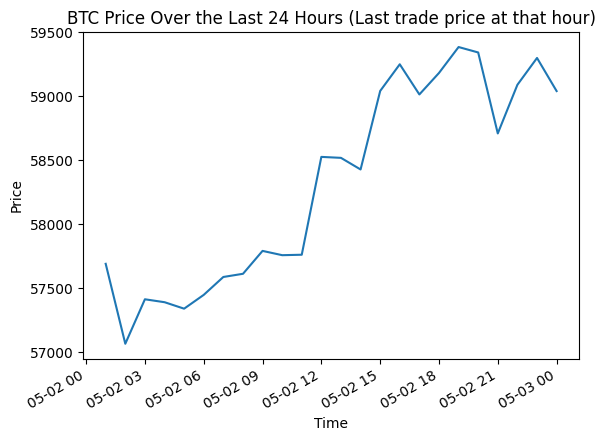

In [23]:

#Lets plot the BTC price
import matplotlib.pyplot as plt
plt.plot(BTC_data['timestamp'], BTC_data['price'])
#Lets format the x axis to make it more readable
plt.gcf().autofmt_xdate()
#Lets add labels
plt.title('BTC Price Over the Last 24 Hours (Last trade price at that hour)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()